
## GNANESH R - 15BCE0255
## CSE 4020 - Machine Learning
## Assignment 1 Regression Techniques

## 1. Consider the given data set. Create a Linear Model to
### A. predict the IQ using data member brain( consider a random value)
### B. predict the IQ using data member brain and weight ( consider random values)
### C. predict the IQ using data member brain, weight and height ( consider randomvalues) 

In [1]:
data<-read.csv("a.csv")
head(data)

PIQ Brain  Height Weight
1 124  81.69 64.5   118   
2 150 103.84 73.3   143   
3 128  96.54 68.8   172   
4 134  95.15 65.0   147   
5 110  92.88 69.0   146   
6 131  99.13 64.5   138

In [2]:
# A. predict the IQ using data member brain( consider a random value)
#predict IQ using Brain
iqbrain<-lm(PIQ~Brain,data)
test<-data.frame(Brain=92)
result1<-predict(iqbrain,test)
result1

1 
112.9002

In [4]:
# B.predict the IQ using data member brain and weight 
#( consider random values)
#predict IQ using Brain and Weight
iqBrainWeight<-lm(PIQ~Brain+Weight,data)
test1<-data.frame(Brain=108,Weight=80)
result2<-predict(iqBrainWeight,test1)
result2

1 
156.7156

In [5]:
# C.predict the IQ using data member 
#brain, weight and height ( consider randomvalues)
#predict IQ using Brain Height and Weight
iqBrainHeightWeight<-lm(PIQ~Brain+Height+Weight,data)
test2<-data.frame(Brain=108,Height=77,Weight=80)
result3<-predict(iqBrainHeightWeight,test2)
result3

1 
123.5595

## 2.Consider the mtcars dataset. Examine the attributes in the dataset.
### A. Examine the logistic regression model for am as a function of wt, mpg and drat

In [15]:
data("mtcars")
head(mtcars)
modelcar<-glm(am~wt+mpg+drat,data=mtcars,family=binomial)
coefficients(modelcar)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

(Intercept)          wt         mpg        drat 
  6.5349048  -5.1112743  -0.3617045   4.2968210

In [13]:
test3<-data.frame(wt=3,mpg=17,drat=2.3)
round(predict(modelcar,test3,type="response"))


1 
0

## 3. Consider the Pima.tr dataset, examine the attributes in the data set
### A. Fit a logistic model of type on age and bmi. Print the coefficients.
### B. What does the model fitted in question 1) predict for someone with age say 35 and bmi of 32

In [16]:
library(MASS)
data("Pima.tr")
reg1<-glm(formula=type~age+bmi,data=Pima.tr,family=binomial)
coefficients(reg1)


(Intercept)         age         bmi 
-6.49869745  0.07103754  0.10518963

In [17]:
testData1=data.frame(age=35,bmi=32)
round(predict(reg1,testData1,type="response"))

1 
0

# Linear Regression in Python

In [1]:
import random
import math

## Linear Algebra

In [2]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

In [3]:
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

## Data
Data consists of users with attributes friends and the amount of time they spend online.

In [4]:
# No. of friends each User has
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,
               15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,
               10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,
               9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,
               7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [2]:
# daily minutes each user spends
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,
                 32.98,35,26.07,23.77,39.73,40.57,31.65,
                 31.21,36.32,20.45,21.93,26.02,27.34,23.49,
                 46.94,30.5,33.8,24.23,21.4,27.94,32.24,
                 40.57,25.07,19.42,22.39,18.42,46.96,23.72,
                 26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,
                 28.66,29.08,37.28,15.28,24.17,22.31,30.17,
                 25.53,19.85,35.37,44.6,17.23,13.47,26.33,
                 35.02,32.09,24.81,19.33,28.77,24.26,31.98,
                 25.73,24.86,16.28,34.51,15.23,39.72,40.8,
                 26.06,35.76,34.76,16.13,44.04,18.03,19.65,
                 32.62,35.59,39.43,14.18,35.24,40.13,41.82,
                 35.45,36.07,43.67,24.61,20.9,21.9,18.79,
                 27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,
                 25.53,24.62,26.25,18.21,28.08,19.42,29.79,
                 32.8,35.99,28.32,27.79,35.88,29.06,36.28,
                 14.1,36.63,37.49,26.9,18.58,38.48,24.48,
                 18.95,33.55,14.24,29.04,32.51,25.63,22.22,
                 19,32.73,15.16,13.9,27.2,32.01,29.27,33,
                 13.74,20.42,27.32,18.23,35.35,28.48,9.08,
                 24.62,20.12,35.26,19.92,31.02,16.49,
                 12.16,30.7,31.22,34.65,13.13,27.51,33.2,
                 31.57,14.1,33.42,17.44,10.12,24.42,9.82,
                 23.39,30.93,15.03,21.67,31.09,33.29,
                 22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### Removing the outliers, i.e, the sample which varies rapidly.

In [6]:
outlier = num_friends.index(100) # index of outlier

In [7]:
num_friends_good = [x for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                    for i, x in enumerate(daily_minutes)
                    if i != outlier]

## Basic Helper functions

In [9]:
def safe(f):
    """return a new function that's the same as f,
    except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # return infinity
    return safe_f

In [10]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

In [11]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]   # create a list of indexes
    random.shuffle(indexes)
    for i in indexes:                           # return the data in that order
        yield data[i]

## Predict and cost Functions

In [12]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [13]:
def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha
    when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

In [14]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

In [15]:
def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),      # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i]# beta partial derivative

## Gradient Descent
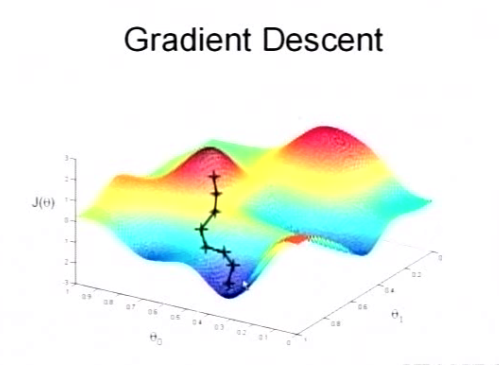
Minimize the cost function to the global minimum. Go through many iterations, and decrease the learning rate when less improvement and stop when we go over 100 iterations with no improvement.

In [17]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))          # initial guess
    theta = theta_0                 # initial step size
    alpha = alpha_0                 # the minimum so far
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

### Initialize theta to random variables
##### theta = [alpha, beta]

In [19]:
random.seed(0)
theta = [random.random(), random.random()]

In [20]:
alpha, beta = minimize_stochastic(squared_error,
                                        squared_error_gradient,
                                        num_friends_good,
                                        daily_minutes_good,
                                        theta,
                                        0.0001)

In [21]:
alpha, beta

(22.93746417548679, 0.9043371597664965)

In [22]:
# I have 50 friends.
my_data = 50

In [23]:
# Predicting the amount of time I will be spending on the site
predict(alpha, beta, my_data)

68.15432216381161

##### This says on average I might spend 68 minutes per day on the site.